In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import timeit
import warnings


from sklearn.compose import ColumnTransformer


from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler


from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier ,VotingClassifier

from sklearn.model_selection import cross_validate ,GridSearchCV
from sklearn.preprocessing import PolynomialFeatures


from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

import joblib 


sm = SMOTE(random_state=27)

In [25]:
data=pd.read_csv('../data/raw/insurance.csv')
df=data
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [27]:
df.duplicated().sum()

0

In [28]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [29]:
# droping the ID column 
df.drop('id',axis=1,inplace=True)

In [30]:
#stplitting data to train and target 
x=df.drop('Response',axis=1)
y=df['Response']

In [7]:
x

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74


In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [9]:
#the target is inbalanced, we are going to use oversampler(SMOTE)
y.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [10]:

OH_encoder= OneHotEncoder(sparse=False,drop='first')

Transformed_columns = OH_encoder.fit_transform(x[['Gender','Vehicle_Age','Vehicle_Damage']])

Transformed_Df = pd.DataFrame(Transformed_columns , columns= OH_encoder.get_feature_names_out())


x = pd.concat([x,Transformed_Df] , axis = 1 )

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
x

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0,0.0,1.0,1.0
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,1.0,0.0,0.0,0.0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0,0.0,1.0,1.0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,1.0,1.0,0.0,0.0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,1.0,0.0,0.0,0.0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,1.0,1.0,0.0,0.0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,1.0,1.0,0.0,0.0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0.0,0.0,1.0,1.0


In [230]:
#x.columns=x.columns.str.replace('<','').str.replace('>','').str.strip()

In [24]:
x.columns=x.columns.str.replace('<','').str.replace('>','').str.strip()
x.drop(['Gender','Vehicle_Age','Vehicle_Damage'],axis=1,inplace=True)

In [11]:
scalers={
"MinMaxScaler":MinMaxScaler(),
"StandardScaler":StandardScaler(),
"RobustScaler":RobustScaler()}

In [12]:
models={
'LR':LogisticRegression(),
'KNN':KNeighborsClassifier(n_jobs=-1),
#'SVM':SVC(),
'MUN':MultinomialNB(),
'DECT':DecisionTreeClassifier(),
'RC':RandomForestClassifier(n_jobs=-1),
"XG" : XGBClassifier(n_jobs=-1)
}

In [18]:
for name, scaler in scalers.items():
    print('\n',"-----------",name,"-----------")
    sm = SMOTE(random_state=27)
    for name,model in models.items():
        steps= list()
        steps.append(('smote', sm))
        steps.append(('scaler', scaler))
        steps.append(('model', model))
        pipeline= Pipeline(steps=steps)
        try:
            # used to avoied MN negative values errors
            start= timeit.default_timer()
            scores= cross_validate(pipeline, x, y,cv=5,  scoring= ["accuracy",'recall',"precision","f1"], return_train_score=True)
        except :
            continue
            
        print(name)
        print("-"*25)
        print("Train Accuracy is " , scores["train_accuracy"].mean())
        print("Test Accuracy is " , scores["test_accuracy"].mean())
        print("-"*25)
        print("Train recall_scores is " , scores["train_recall"].mean())
        print("Test recall_scores is " , scores["test_recall"].mean())
        print("-"*25)
        print("Train precision_scores is " , scores["train_precision"].mean())
        print("Test precision_scores is " , scores["test_precision"].mean())
        print("="*50)
        print("Train f1_scores is " , scores["train_f1"].mean())
        print("Test f1_scores is " , scores["test_f1"].mean())
        print("="*50)
            
        stop= timeit.default_timer()
        print("Run Time in min. :", ((stop - start)/60),'\n')
        




 ----------- MinMaxScaler -----------
LR
-------------------------
Train Accuracy is  0.6545509284543792
Test Accuracy is  0.6545817608354987
-------------------------
Train recall_scores is  0.9295761078998073
Test recall_scores is  0.9295868122457718
-------------------------
Train precision_scores is  0.25276173075419966
Test precision_scores is  0.2527813607381999
Train f1_scores is  0.39745144358356954
Test f1_scores is  0.39747495125166027
Run Time in min. : 0.18935820333333359 

KNN
-------------------------
Train Accuracy is  0.8743758350699393
Test Accuracy is  0.8015265992311417
-------------------------
Train recall_scores is  0.7353564547206166
Test recall_scores is  0.48430742881609934
-------------------------
Train precision_scores is  0.4916513424861164
Test precision_scores is  0.30499657523418744
Train f1_scores is  0.5893015494620081
Test f1_scores is  0.37427998346054864
Run Time in min. : 7.458839133333333 

MUN
-------------------------
Train Accuracy is  0.68848

XG
-------------------------
Train Accuracy is  0.8454287357295712
Test Accuracy is  0.8384687802891149
-------------------------
Train recall_scores is  0.39438021836865766
Test recall_scores is  0.36613144936844355
-------------------------
Train precision_scores is  0.37565135964990265
Test precision_scores is  0.3486326265871762
Train f1_scores is  0.38473485952205494
Test f1_scores is  0.35711800238661134
Run Time in min. : 0.2855432333333283 



In [17]:
Encoder = ColumnTransformer( 
    transformers=[('OH_encoder',OneHotEncoder(sparse=False,drop='first'),['Gender','Vehicle_Age','Vehicle_Damage'])],
                                            remainder= 'passthrough')

In [19]:
steps= list()
steps.append(('Encoder', Encoder))
steps.append(('scaler', StandardScaler()))
pre_pipeline= Pipeline(steps=steps)
pre_pipeline.fit(x)
joblib.dump(pre_pipeline,'../models/Pre_pipeline.h5')

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['../models/Pre_pipeline2.h5']

# SVC 

In [ ]:
model=SVC()


scalers=StandardScaler()
steps = list()
steps.append(('Encoder', Encoder))
steps.append(('smote', sm))
steps.append(('scaler', scalers))
steps.append(('model', model))
pipeline = Pipeline(steps=steps)

start= timeit.default_timer()
scores = cross_validate(pipeline, x, y, cv=5, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True)
            

stop= timeit.default_timer()
print("Run Time in min. :", ((stop - start)/60),'\n')


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# KNN classifier 

In [256]:
y.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

Run Time in min. : 6.887828916666694 

Run Time in min. : 7.548444483333272 

Run Time in min. : 8.129084149999956 

Run Time in min. : 8.701169686666738 

Run Time in min. : 9.185109273333364 

Run Time in min. : 9.569352328333359 

Run Time in min. : 9.90664513833326 

Run Time in min. : 10.22544019500007 

Run Time in min. : 10.519078994999896 

Run Time in min. : 10.81123922333342 



<AxesSubplot:>

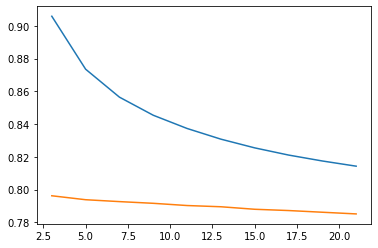

In [257]:
train_accuarcy= []
test_accuarcy= []

for k in range(3,23,2):
    steps= list()
    steps.append(('Encoder', Encoder))
    steps.append(('smote', sm))
    steps.append(('scaler', scalers))
    steps.append(('KNN',KNeighborsClassifier(n_neighbors=k,n_jobs=-1)))
    pipeline= Pipeline(steps=steps)
    start= timeit.default_timer()
    scores= cross_validate(pipeline, x, y, scoring='accuracy',cv=5,return_train_score=True)
    stop= timeit.default_timer()
    print("Run Time in min. :", ((stop - start)/60),'\n')
    
    train_accuarcy.append(scores['train_score'].mean())
    test_accuarcy.append(scores['test_score'].mean())
sns.lineplot(x= range(3,23,2), y=train_accuarcy)
sns.lineplot(x= range(3,23,2), y=test_accuarcy)



In [95]:
train_accuarcy

[0.9001053507375548,
 0.8854710858494421,
 0.8810963529854143,
 0.8792025378680342,
 0.8783536993407454,
 0.8779824144073449,
 0.8777055907866249,
 0.8776209693292042,
 0.8775501234479683,
 0.8774996129632303]

In [28]:
test_accuarcy

[0.8655902610237988, 0.8577029795781572]

In [32]:
#Running KNN withe the best n_neighbors

scalers=StandardScaler()
model=KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

steps = list()
steps.append(('Encoder', Encoder))
steps.append(('scaler', scalers))
steps.append(('model', model))
pipeline = Pipeline(steps=steps)

start= timeit.default_timer()
scores = cross_validate(pipeline, x, y, cv=5, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True)
            
print(model)
print("-"*25)
print("Train Accuracy is " , scores["train_accuracy"].mean())
print("Test Accuracy is " , scores["test_accuracy"].mean())
print("-"*25)
print("Train recall_scores is " , scores["train_recall"].mean())
print("Test recall_scores is " , scores["test_recall"].mean())
print("-"*25)
print("Train precision_scores is " , scores["train_precision"].mean())
print("Test precision_scores is " , scores["test_precision"].mean())
print("="*50)
print("Train f1_scores is " , scores["train_f1"].mean())
print("Test f1_scores is " , scores["test_f1"].mean())
print("="*50)
  


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

KNeighborsClassifier(n_jobs=-1)
-------------------------
Train Accuracy is  0.896618814881629
Test Accuracy is  0.8556528410505235
-------------------------
Train recall_scores is  0.34150074930421753
Test recall_scores is  0.17248983087133377
-------------------------
Train precision_scores is  0.6486315127716847
Test precision_scores is  0.3300151355711938
Train f1_scores is  0.4474305570347389
Test f1_scores is  0.22655134821215556


## Grid search for Random Forest Classifier to find the best paramiters

In [22]:
params = [{
    'criterion': ['gini','entropy'],
    "n_estimators": range(10,300,50),
    "max_depth": range(10,30),
    "min_samples_split": [2, 4, 8],
    "min_samples_leaf": [1, 2, 4],
}]


In [23]:
model=RandomForestClassifier()

grid_search=GridSearchCV(estimator=model,
                         param_grid=params,
                         scoring='accuracy',
                         n_jobs=-1)
scalers=StandardScaler()
steps = list()
steps.append(('Encoder', Encoder))
steps.append(('smote', sm))
steps.append(('scaler', scalers))
steps.append(('grid_search', grid_search))
pipeline = Pipeline(steps=steps)

start= timeit.default_timer()
scores = cross_validate(pipeline, x, y, cv=5, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True)
            

stop= timeit.default_timer()
print("Run Time in min. :", ((stop - start)/60),'\n')


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KeyboardInterrupt: 

In [50]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 24, 'min_samples_leaf': 2, 'min_samples_split': 4}
0.8763430131383843


## Trying the model with the selected paramiters

In [38]:
scalers=StandardScaler()
model=RandomForestClassifier(criterion= 'entropy',n_jobs=-1)

steps = list()
steps.append(('Encoder', Encoder))
steps.append(('scaler', scalers))
steps.append(('model', model))
pipeline = Pipeline(steps=steps)

start= timeit.default_timer()
scores = cross_validate(pipeline, x, y, cv=5, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True)
            
print(model)
print("-"*25)
print("Train Accuracy is " , scores["train_accuracy"].mean())
print("Test Accuracy is " , scores["test_accuracy"].mean())
print("-"*25)
print("Train recall_scores is " , scores["train_recall"].mean())
print("Test recall_scores is " , scores["test_recall"].mean())
print("-"*25)
print("Train precision_scores is " , scores["train_precision"].mean())
print("Test precision_scores is " , scores["test_precision"].mean())
print("="*50)
print("Train f1_scores is " , scores["train_f1"].mean())
print("Test f1_scores is " , scores["test_f1"].mean())
print("="*50)
            
stop= timeit.default_timer()
print("Run Time in min. :", ((stop - start)/60),'\n')

RandomForestClassifier(criterion='entropy', n_jobs=-1)
-------------------------
Train Accuracy is  0.9998733958031636
Test Accuracy is  0.8661196660871056
-------------------------
Train recall_scores is  0.9992614001284522
Test recall_scores is  0.11941768357953328
-------------------------
Train precision_scores is  0.9997055051044759
Test precision_scores is  0.360581927551621
Train f1_scores is  0.9994834008766812
Test f1_scores is  0.17940407026918997
Run Time in min. : 2.066896325000001 



## Bagging Classifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=27)

bagging_classifier = BaggingClassifier(base_estimator=RandomForestClassifier(n_jobs=-1), n_estimators=20)


scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

start= timeit.default_timer()

bagging_classifier.fit(x_train, y_train)

y_pred = bagging_classifier.predict(x_test)

print('training accuracy:', accuracy_score(y_train, bagging_classifier.predict(x_train)))
print('testing accuracy:', accuracy_score(y_pred,y_test))

stop= timeit.default_timer()
print("Run Time in min. :", ((stop - start)/60),'\n')

#without smot & scaler
#training accuracy: 0.9748872585548803
#testing accuracy: 0.872478431537186
#Run Time in min. : 4.710300201666663 

#with smot & scaler
#training accuracy: 0.9908001148490214
#testing accuracy: 0.8388190348244086
#Run Time in min. : 9.751795286666644 

#with smot only
#training accuracy: 0.9910314080170998
#testing accuracy: 0.8389239908478348
#Run Time in min. : 10.487870851666655

#with the scaler only
#training accuracy: 0.9752476113507632
#testing accuracy: 0.872394466718445
#Run Time in min. : 4.530094556666669

In [41]:
#the same code but with cross validation

warnings.filterwarnings('ignore')

scaler= StandardScaler()

model = BaggingClassifier(base_estimator=RandomForestClassifier(n_jobs=-1), n_estimators=20)


steps = list()
steps.append(('Encoder', Encoder))
steps.append(('smote', sm))
steps.append(('scaler', scalers))
steps.append(('model', model))
pipeline = Pipeline(steps=steps)

start= timeit.default_timer()
scores = cross_validate(pipeline, x, y, cv=5, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True)
            
print(model)
print("-"*25)
print("Train Accuracy is " , scores["train_accuracy"].mean())
print("Test Accuracy is " , scores["test_accuracy"].mean())
print("-"*25)
print("Train recall_scores is " , scores["train_recall"].mean())
print("Test recall_scores is " , scores["test_recall"].mean())
print("-"*25)
print("Train precision_scores is " , scores["train_precision"].mean())
print("Test precision_scores is " , scores["test_precision"].mean())
print("="*50)
print("Train f1_scores is " , scores["train_f1"].mean())
print("Test f1_scores is " , scores["test_f1"].mean())
print("="*50)
            
stop= timeit.default_timer()
print("Run Time in min. :", ((stop - start)/60),'\n')
     

BaggingClassifier(base_estimator=RandomForestClassifier(n_jobs=-1),
                  n_estimators=20)
-------------------------
Train Accuracy is  0.98429517530089
Test Accuracy is  0.8506017925938026
-------------------------
Train recall_scores is  0.8841040462427745
Test recall_scores is  0.24512952258617
-------------------------
Train precision_scores is  0.9863437494299087
Test precision_scores is  0.34562992911498297
Train f1_scores is  0.9324288600638487
Test f1_scores is  0.28682327586415585
Run Time in min. : 58.53099647333332 



In [54]:
model

BaggingClassifier(base_estimator=RandomForestClassifier(n_jobs=-1),
                  n_estimators=20)

In [51]:
steps= list()
steps.append(('Encoder', Encoder))
steps.append(('scaler', StandardScaler()))
pre_pipeline= Pipeline(steps=steps)
x_pre=pre_pipeline.fit_transform(x)


In [53]:
model.fit(x_pre,y)
joblib.dump(model,'../models/BaggingC.h5')

['BaggingC.h5']

# AdaBoostClassifier

In [44]:


warnings.filterwarnings('ignore')


model = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_jobs=-1), n_estimators=20)


steps = list()
steps.append(('Encoder', Encoder))
steps.append(('smote', sm))
steps.append(('scaler', scalers))
steps.append(('model', model))
pipeline = Pipeline(steps=steps)

start= timeit.default_timer()
scores = cross_validate(pipeline, x, y, cv=5, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True)
            
print(model)
print("-"*25)
print("Train Accuracy is " , scores["train_accuracy"].mean())
print("Test Accuracy is " , scores["test_accuracy"].mean())
print("-"*25)
print("Train recall_scores is " , scores["train_recall"].mean())
print("Test recall_scores is " , scores["test_recall"].mean())
print("-"*25)
print("Train precision_scores is " , scores["train_precision"].mean())
print("Test precision_scores is " , scores["test_precision"].mean())
print("="*50)
print("Train f1_scores is " , scores["train_f1"].mean())
print("Test f1_scores is " , scores["test_f1"].mean())
print("="*50)
            
stop= timeit.default_timer()
print("Run Time in min. :", ((stop - start)/60),'\n')
     

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_jobs=-1),
                   n_estimators=20)
-------------------------
Train Accuracy is  0.9998865154007595
Test Accuracy is  0.8405101885149258
-------------------------
Train recall_scores is  0.9995076000856347
Test recall_scores is  0.3248126739456219
-------------------------
Train precision_scores is  0.999566459656951
Test precision_scores is  0.3415947827739324
Train f1_scores is  0.9995370231050671
Test f1_scores is  0.33297986135153057
Run Time in min. : 161.07663027166663 



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=27)

sm = SMOTE(random_state=27)
x_train, y_train = sm.fit_resample(x_train, y_train)

scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


adaboost_classifier = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_jobs=-1), n_estimators=10)
start= timeit.default_timer()
adaboost_classifier.fit(x_train, y_train)

y_pred = adaboost_classifier.predict(x_test)

print('training accuracy:', accuracy_score(y_train, adaboost_classifier.predict(x_train)))
print('testing accuracy:', accuracy_score(y_pred,y_test))
stop= timeit.default_timer()
print("Run Time in min. :", ((stop - start)/60),'\n')

#with smot & Scaler
#training accuracy: 0.999828570029143
#testing accuracy: 0.8694661936648544

#with Scaler only
#training accuracy: 0.9998775500208165
#testing accuracy: 0.8699909737819853
#Run Time in min. : 4.036696914999993

#without smot & Scaler
#training accuracy: 0.9998775500208165
#testing accuracy: 0.8700224605890132
#Run Time in min. : 4.046720693333373



## Trying XGB Classifier

In [43]:
warnings.filterwarnings('ignore')

for n in range(10, 60, 20):
    models = XGBClassifier(n_estimators=n)
    
    start = timeit.default_timer()
    steps = list()
    steps.append(('encoder', Encoder))
    steps.append(('smote', sm))
    steps.append(('scaler', scalers))
    steps.append(('XG',models))
        
    pipeline = Pipeline(steps=steps)
    scores = cross_validate(pipeline, x, y, cv=5, scoring=["accuracy", 'recall', "precision", "f1"], return_train_score=True)
    print('XG',n)
    print("-" * 25)
    print("Train Accuracy is", scores["train_accuracy"].mean())
    print("Test Accuracy is", scores["test_accuracy"].mean())
    print("-" * 25)
    print("Train recall_scores is", scores["train_recall"].mean())
    print("Test recall_scores is", scores["test_recall"].mean())
    print("-" * 25)
    print("Train precision_scores is", scores["train_precision"].mean())
    print("Test precision_scores is", scores["test_precision"].mean())
    print("=" * 50)
    print("Train f1_scores is", scores["train_f1"].mean())
    print("Test f1_scores is", scores["test_f1"].mean())
    print("=" * 50)
    stop = timeit.default_timer()
    print("Run Time", stop - start)


XG 10
-------------------------
Train Accuracy is 0.7794318669839513
Test Accuracy is 0.7789949850401165
-------------------------
Train recall_scores is 0.7002729608220939
Test recall_scores is 0.6986084350246199
-------------------------
Train precision_scores is 0.3182825692634863
Test precision_scores is 0.31748413554251564
Train f1_scores is 0.43763120903400915
Test f1_scores is 0.4365519267600164
Run Time 9.760644800000591
XG 30
-------------------------
Train Accuracy is 0.817115312857118
Test Accuracy is 0.8157115122863792
-------------------------
Train recall_scores is 0.514702419182188
Test recall_scores is 0.5086705202312138
-------------------------
Train precision_scores is 0.33831178068503587
Test precision_scores is 0.3344325802270025
Train f1_scores is 0.40823067439062954
Test f1_scores is 0.40351771294051453
Run Time 11.132083700000294
XG 50
-------------------------
Train Accuracy is 0.8469125620666104
Test Accuracy is 0.8431131259107778
-------------------------
Tra

# Votting classfier

In [29]:
models=[]
scalers=StandardScaler()
models.append(("Voting" , VotingClassifier(estimators=[('Model',RandomForestClassifier(n_jobs=-1)),
('bagging_classifier',BaggingClassifier(base_estimator=RandomForestClassifier(n_jobs=-1), n_estimators=10)),
("XG" , XGBClassifier(n_estimators=50,n_jobs=-1)),
("KNN" ,KNeighborsClassifier(n_neighbors= 5,n_jobs=-1))],voting='soft')) )
for model in models:   
    start= timeit.default_timer()
    steps= list()
    steps.append(('scaler', scalers))
    steps.append(model)
    pipeline=Pipeline(steps=steps)
    scores= cross_validate(pipeline, x, y, cv= 5, scoring= ["accuracy",'recall',"precision","f1"], return_train_score=True)
    
    print(model[0])
    print("-"*25)
    print("Train Accuracy is " , scores["train_accuracy"].mean())
    print("Test Accuracy is " , scores["test_accuracy"].mean())
    print("-"*25)
    print("Train recall_scores is " , scores["train_recall"].mean())
    print("Test recall_scores is " , scores["test_recall"].mean())
    print("-"*25)
    print("Train precision_scores is " , scores["train_precision"].mean())
    print("Test precision_scores is " , scores["test_precision"].mean())
    print("="*50)
    print("Train f1_scores is " , scores["train_f1"].mean())
    print("Test f1_scores is " , scores["test_f1"].mean())
    print("="*50)
    stop= timeit.default_timer()
    print("Run Time", stop - start)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Voting
-------------------------
Train Accuracy is  0.9819706418144115
Test Accuracy is  0.8863260384151228
-------------------------
Train recall_scores is  0.9829260870557761
Test recall_scores is  0.88613930282469
-------------------------
Train precision_scores is  0.9810545686307256
Test precision_scores is  0.8882433897231339
Train f1_scores is  0.9819893259305947
Test f1_scores is  0.8737025047461785
Run Time 2823.2196446


In [58]:
models=[]
scalers=StandardScaler()
models.append(("Voting" , VotingClassifier(estimators=[('Model',RandomForestClassifier(n_jobs=-1)),
('bagging_classifier',BaggingClassifier(base_estimator=RandomForestClassifier(n_jobs=-1), n_estimators=10)),
('AdaBoostClassifier',AdaBoostClassifier(base_estimator=RandomForestClassifier(n_jobs=-1), n_estimators=10)),
("XG" , XGBClassifier(n_estimators=50,n_jobs=-1)),
("KNN" ,KNeighborsClassifier(n_neighbors= 5,n_jobs=-1))],voting='soft')) )
for model in models:   
    start= timeit.default_timer()
    steps= list()
    steps.append(('smote', sm))
    steps.append(('scaler', scalers))
    steps.append(model)
    pipeline=Pipeline(steps=steps)
    scores= cross_validate(pipeline, x, y, cv= 5, scoring= ["accuracy",'recall',"precision","f1"], return_train_score=True)
    
    print(model[0])
    print("-"*25)
    print("Train Accuracy is " , scores["train_accuracy"].mean())
    print("Test Accuracy is " , scores["test_accuracy"].mean())
    print("-"*25)
    print("Train recall_scores is " , scores["train_recall"].mean())
    print("Test recall_scores is " , scores["test_recall"].mean())
    print("-"*25)
    print("Train precision_scores is " , scores["train_precision"].mean())
    print("Test precision_scores is " , scores["test_precision"].mean())
    print("="*50)
    print("Train f1_scores is " , scores["train_f1"].mean())
    print("Test f1_scores is " , scores["test_f1"].mean())
    print("="*50)
    stop= timeit.default_timer()
    print("Run Time", stop - start)
#Voting
#-------------------------
#Train Accuracy is  0.988461962502576
#Test Accuracy is  0.8318564976271471
#-------------------------
#Train recall_scores is  0.9353350460286876
#Test recall_scores is  0.38420038535645473
#-------------------------
#Train precision_scores is  0.9694516562826765
#Test precision_scores is  0.3369166073485196
#==================================================
#Train f1_scores is  0.9520875142404254
#Test f1_scores is  0.3589977848574827
#==================================================
#Run Time 6076.5307385000015

Voting
-------------------------
Train Accuracy is  0.988461962502576
Test Accuracy is  0.8318564976271471
-------------------------
Train recall_scores is  0.9353350460286876
Test recall_scores is  0.38420038535645473
-------------------------
Train precision_scores is  0.9694516562826765
Test precision_scores is  0.3369166073485196
Train f1_scores is  0.9520875142404254
Test f1_scores is  0.3589977848574827
Run Time 6076.5307385000015


In [18]:
models=[]
scalers=StandardScaler()
models.append(("Voting" , VotingClassifier(estimators=[('Model',RandomForestClassifier(n_jobs=-1)),
('bagging_classifier',BaggingClassifier(base_estimator=RandomForestClassifier(n_jobs=-1), n_estimators=10)),
("XG" , XGBClassifier(n_estimators=50,n_jobs=-1)),
("KNN" ,KNeighborsClassifier(n_neighbors= 5,n_jobs=-1))],voting='hard')) )
for model in models:   
    start= timeit.default_timer()
    steps= list()
    steps.append(('encoder', Encoder))
    steps.append(('smote', sm))
    steps.append(('scaler', scalers))
    steps.append(model)
    pipeline=Pipeline(steps=steps)
    scores= cross_validate(pipeline, x, y, cv= 5, scoring= ["accuracy",'recall',"precision","f1"], return_train_score=True)
    
    print(model[0])
    print("-"*25)
    print("Train Accuracy is " , scores["train_accuracy"].mean())
    print("Test Accuracy is " , scores["test_accuracy"].mean())
    print("-"*25)
    print("Train recall_scores is " , scores["train_recall"].mean())
    print("Test recall_scores is " , scores["test_recall"].mean())
    print("-"*25)
    print("Train precision_scores is " , scores["train_precision"].mean())
    print("Test precision_scores is " , scores["test_precision"].mean())
    print("="*50)
    print("Train f1_scores is " , scores["train_f1"].mean())
    print("Test f1_scores is " , scores["test_f1"].mean())
    print("="*50)
    stop= timeit.default_timer()
    print("Run Time", stop - start)

Voting
-------------------------
Train Accuracy is  0.9705615718187456
Test Accuracy is  0.8548289297052861
-------------------------
Train recall_scores is  0.7726718047527296
Test recall_scores is  0.21466495397131236
-------------------------
Train precision_scores is  0.98363178417945
Test precision_scores is  0.34972900886632396
Train f1_scores is  0.8654771307289539
Test f1_scores is  0.26601680626962604
Run Time 2586.7885130000004


In [44]:
steps= list()
steps.append(('Encoder', Encoder))
steps.append(('scaler', StandardScaler()))
pre_pipeline= Pipeline(steps=steps)
x_pre=pre_pipeline.fit_transform(x)


In [46]:
voting_classifier = VotingClassifier(estimators=[('Model', RandomForestClassifier(n_jobs=-1)),
                                               ('bagging_classifier', BaggingClassifier(base_estimator=RandomForestClassifier(n_jobs=-1))),
                                               ('XG', XGBClassifier(n_estimators=50, n_jobs=-1)),
                                               ('KNN', KNeighborsClassifier(n_jobs=-1))])

voting_classifier_pipeline = Pipeline([('voting_classifier', voting_classifier)])

voting_classifier_pipeline.fit(x_pre, y)

Pipeline(steps=[('voting_classifier',
                 VotingClassifier(estimators=[('Model',
                                               RandomForestClassifier(n_jobs=-1)),
                                              ('bagging_classifier',
                                               BaggingClassifier(base_estimator=RandomForestClassifier(n_jobs=-1))),
                                              ('XG',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             device=None,
                                                             early_...
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=50,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...)),
                                              ('KNN',
                                               KNeighborsClassifier(n_jobs=-1))]))])

In [48]:
joblib.dump(voting_classifier_pipeline,'../models/VotingC_model.h5')

['VotingC_model.h5']

In [31]:
scalers=MinMaxScaler()
model=RandomForestClassifier(n_jobs=-1)

steps = list()
steps.append(('scaler', scalers))
steps.append(('smote', sm))
steps.append(('model', model))
pipeline = Pipeline(steps=steps)

start= timeit.default_timer()
scores = cross_validate(pipeline, x, y, cv=5, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True)
            
print(model)
print("-"*25)
print("Train Accuracy is " , scores["train_accuracy"].mean())
print("Test Accuracy is " , scores["test_accuracy"].mean())
print("-"*25)
print("Train recall_scores is " , scores["train_recall"].mean())
print("Test recall_scores is " , scores["test_recall"].mean())
print("-"*25)
print("Train precision_scores is " , scores["train_precision"].mean())
print("Test precision_scores is " , scores["test_precision"].mean())
print("="*50)
print("Train f1_scores is " , scores["train_f1"].mean())
print("Test f1_scores is " , scores["test_f1"].mean())
print("="*50)
            
stop= timeit.default_timer()
print("Run Time in min. :", ((stop - start)/60),'\n')
        


RandomForestClassifier(n_jobs=-1)
-------------------------
Train Accuracy is  0.9998773316768483
Test Accuracy is  0.8293480302363131
-------------------------
Train recall_scores is  0.9994326696638837
Test recall_scores is  0.3922286448298009
-------------------------
Train precision_scores is  0.9995664261350143
Test precision_scores is  0.33328613271727886
Train f1_scores is  0.9994995381982938
Test f1_scores is  0.36035031523949257
Run Time in min. : 6.7676599599999765 



## Checking feature selection method

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=27)

sm = SMOTE(random_state=27)
x_train, y_train = sm.fit_resample(x_train, y_train)

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)



model=RandomForestClassifier(n_jobs=-1)
start= timeit.default_timer()

model.fit(x_train, y_train)
stop= timeit.default_timer()
print("Run Time in min. :", ((stop - start)/60),'\n')

y_pred = model.predict(x_test)
print('training accuracy:', accuracy_score(y_train, model.predict(x_train)))
print('testing accuracy:', accuracy_score(y_pred,y_test))

Run Time in min. : 0.5752829949999978 

training accuracy: 0.9998564387232617
testing accuracy: 0.8396901698188459


In [64]:
model.feature_importances_

array([0.0912874 , 0.00030991, 0.08156138, 0.14213919, 0.09898218,
       0.07272755, 0.10625691, 0.09227787, 0.08333979, 0.03125069,
       0.19986715])

In [65]:
features=x.columns
features

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Male',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_Yes'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

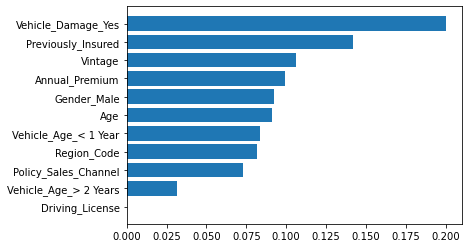

In [66]:
fs=list(zip(features,model.feature_importances_))
fs.sort(key=lambda x: x[1])
plt.barh([x[0] for x in fs],[x[1]for x in fs])
plt.show

In [137]:
x.drop(['Driving_License'],axis=1,inplace=True)

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=27)

sm = SMOTE(random_state=27)
x_train, y_train = sm.fit_resample(x_train, y_train)


scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)



model=RandomForestClassifier(n_jobs=-1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('training accuracy:', accuracy_score(y_train, model.predict(x_train)))
print('testing accuracy:', accuracy_score(y_pred,y_test))

training accuracy: 0.9998703960696113
testing accuracy: 0.8348202103318709


In [ ]:
training accuracy: 0.9998125727775917
testing accuracy: 0.8371712252566175

<function matplotlib.pyplot.show(close=None, block=None)>

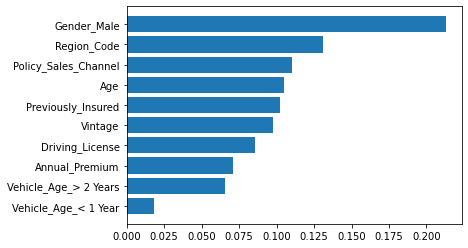

In [139]:
fs=list(zip(features,model.feature_importances_))
fs.sort(key=lambda x: x[1])
plt.barh([x[0] for x in fs],[x[1]for x in fs])
plt.show

In [72]:
x.drop('Vehicle_Age_< 1 Year',axis=1,inplace=True)

In [ ]:
#Selected features

# Trying another encoding method 

In [297]:
df=data

In [301]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [293]:
BN_encoder=BinaryEncoder()
Transformed_Vehicle_Age_Df = BN_encoder.fit_transform(df['Vehicle_Age'])

In [302]:
Vehicle_Age = {'< 1 Year':1,
        '1-2 Year':2,
        '> 2 Years':3}

# apply using map
df['Vehicle_Age'] = df['Vehicle_Age'].map(Vehicle_Age)

In [303]:
df = pd.concat([df,Transformed_pd] , axis = 1 )

In [305]:
df.drop(['id','Gender','Vehicle_Damage','Driving_License','Vehicle_Age'],axis=1,inplace=True)

In [240]:
df=pd.get_dummies(df)

In [306]:
df

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Damage_Yes
0,44,28.0,0,40454.0,26.0,217,1,1.0,1.0
1,76,3.0,0,33536.0,26.0,183,0,1.0,0.0
2,47,28.0,0,38294.0,26.0,27,1,1.0,1.0
3,21,11.0,1,28619.0,152.0,203,0,1.0,0.0
4,29,41.0,1,27496.0,152.0,39,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
381104,74,26.0,1,30170.0,26.0,88,0,1.0,0.0
381105,30,37.0,1,40016.0,152.0,131,0,1.0,0.0
381106,21,30.0,1,35118.0,160.0,161,0,1.0,0.0
381107,68,14.0,0,44617.0,124.0,74,0,0.0,1.0


In [307]:
x=df.drop('Response',axis=1)
y=df['Response']

In [308]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=27)

sm = SMOTE(random_state=27)
x_train, y_train = sm.fit_resample(x_train, y_train)

scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


model=RandomForestClassifier(n_jobs=-1)
start= timeit.default_timer()

model.fit(x_train, y_train)
stop= timeit.default_timer()
print("Run Time in min. :", ((stop - start)/60),'\n')

y_pred = model.predict(x_test)
print('training accuracy:', accuracy_score(y_train, model.predict(x_train)))
print('testing accuracy:', accuracy_score(y_pred,y_test))
#1st
#Run Time in min. : 0.558687476666637 

#training accuracy: 0.9998624204431258
#testing accuracy: 0.8343688994311383

#2nd (Drop Drive licence)
#Run Time in min. : 0.5754163066666782 

#training accuracy: 0.9998664082563685
#testing accuracy: 0.8361951342387539

#3rd (Drop )

Run Time in min. : 0.5909966850000273 

training accuracy: 0.9998065910577276
testing accuracy: 0.8319549108923361


<function matplotlib.pyplot.show(close=None, block=None)>

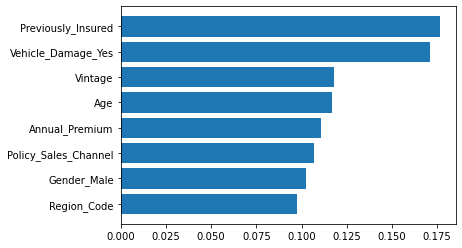

In [309]:
features=x.columns
fs=list(zip(features,model.feature_importances_))
fs.sort(key=lambda x: x[1])
plt.barh([x[0] for x in fs],[x[1]for x in fs])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

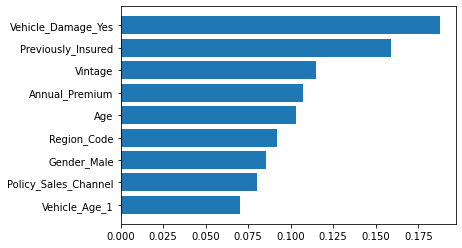

In [194]:
features=x.columns
fs=list(zip(features,model.feature_importances_))
fs.sort(key=lambda x: x[1])
plt.barh([x[0] for x in fs],[x[1]for x in fs])
plt.show

In [17]:
x.drop('Driving_License',axis=1,inplace=True)
x

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,28.0,0,40454.0,26.0,217,1.0,0.0,1.0,1.0
1,76,3.0,0,33536.0,26.0,183,1.0,0.0,0.0,0.0
2,47,28.0,0,38294.0,26.0,27,1.0,0.0,1.0,1.0
3,21,11.0,1,28619.0,152.0,203,1.0,1.0,0.0,0.0
4,29,41.0,1,27496.0,152.0,39,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
381104,74,26.0,1,30170.0,26.0,88,1.0,0.0,0.0,0.0
381105,30,37.0,1,40016.0,152.0,131,1.0,1.0,0.0,0.0
381106,21,30.0,1,35118.0,160.0,161,1.0,1.0,0.0,0.0
381107,68,14.0,0,44617.0,124.0,74,0.0,0.0,1.0,1.0


In [18]:
scalers=StandardScaler()
model=RandomForestClassifier(n_jobs=-1)

steps = list()
steps.append(('smote', sm))
steps.append(('scaler', scalers))
steps.append(('model', model))
pipeline = Pipeline(steps=steps)

start= timeit.default_timer()
scores = cross_validate(pipeline, x, y, cv=5, scoring=["accuracy", "recall", "precision", "f1"], return_train_score=True)
            
print(model)
print("-"*25)
print("Train Accuracy is " , scores["train_accuracy"].mean())
print("Test Accuracy is " , scores["test_accuracy"].mean())
print("-"*25)
print("Train recall_scores is " , scores["train_recall"].mean())
print("Test recall_scores is " , scores["test_recall"].mean())
print("-"*25)
print("Train precision_scores is " , scores["train_precision"].mean())
print("Test precision_scores is " , scores["test_precision"].mean())
print("="*50)
print("Train f1_scores is " , scores["train_f1"].mean())
print("Test f1_scores is " , scores["test_f1"].mean())
print("="*50)
            
stop= timeit.default_timer()
print("Run Time in min. :", ((stop - start)/60),'\n')
        


RandomForestClassifier(n_jobs=-1)
-------------------------
Train Accuracy is  0.9997894303221804
Test Accuracy is  0.8403343863908118
-------------------------
Train recall_scores is  0.9994219653179192
Test recall_scores is  0.29957182616142153
-------------------------
Train precision_scores is  0.9988606380311221
Test precision_scores is  0.33215475478462153
Train f1_scores is  0.9991412199043197
Test f1_scores is  0.3150109006028936
Run Time in min. : 3.978092393333327 

